ivancloudvm@gmail.com

# Matplotlib Keith [tutorial](https://www.youtube.com/watch?v=0P7QnIQDBJY&ab_channel=KeithGalli)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos datos:

In [2]:
ruta_fifa=r"C:\Users\1v4n\matplotlib_tutorial-master\fifa_data.csv"
ruta_gas=r"C:\Users\1v4n\matplotlib_tutorial-master\gas_prices.csv"

gas = pd.read_csv(ruta_gas)
fifa = pd.read_csv(ruta_fifa)

gas.head(5)

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


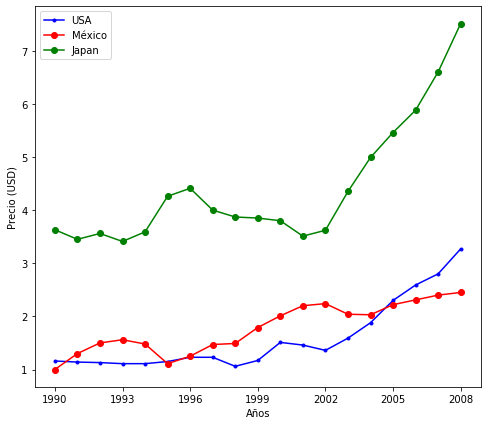

In [3]:
plt.figure(figsize = (8,7))

plt.plot(gas.Year, gas["USA"],"b.-", label= "USA" )
plt.plot(gas.Year, gas.Mexico, "ro-",label= "México")
plt.plot(gas.Year, gas.France, "go-",label= "Japan")

plt.legend()

plt.xticks(gas.Year[::3])
plt.xlabel("Años")
plt.yticks()
plt.ylabel("Precio (USD)")

plt.show()

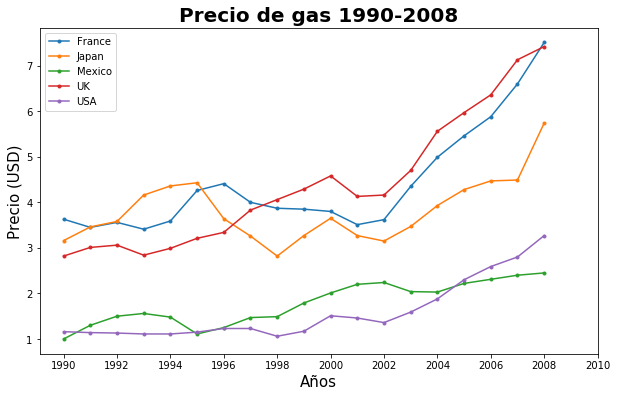

In [4]:
paises = ['France', 'Japan','Mexico','UK', 'USA']


plt.figure(figsize = (10,6)) 

for pais in paises:
    plt.plot(gas.Year,gas[pais],".-",label=pais)

plt.title("Precio de gas 1990-2008",fontdict ={"fontweight":"bold", "fontsize":20})
plt.xticks(gas.Year[::2].tolist()+[2010])
plt.xlabel("Años",fontdict ={"fontsize":15})
plt.ylabel("Precio (USD)",fontdict ={"fontsize":15})
plt.legend()
plt.savefig("precio_gas.jpg",dpi = 200)
plt.show()



In [5]:
gas.Year[::2].tolist()

[1990, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008]

## Guardar figura en archivo:

Se usa la funcion plt.savefig("nombre", dpi= num)


## Fifa data

In [6]:
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


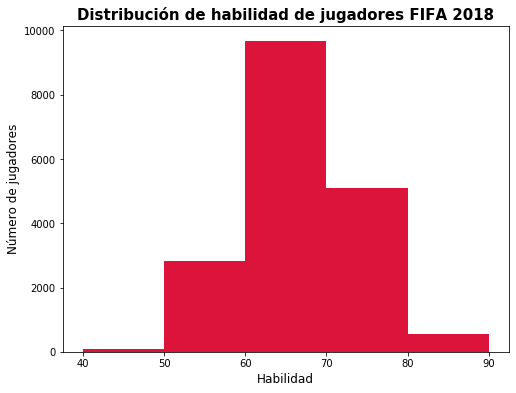

In [7]:
bines = [x * 10 for x in range(4,10)]

plt.figure(figsize =(8,6))
plt.hist(fifa.Overall, bines,color = "crimson")

plt.title("Distribución de habilidad de jugadores FIFA 2018",fontdict ={"fontweight":"bold", "fontsize":15})
plt.xticks(bines)
plt.xlabel("Habilidad",fontdict ={"fontsize":12})
plt.ylabel("Número de jugadores",fontdict ={"fontsize":12})

plt.show()

## Grafico circular

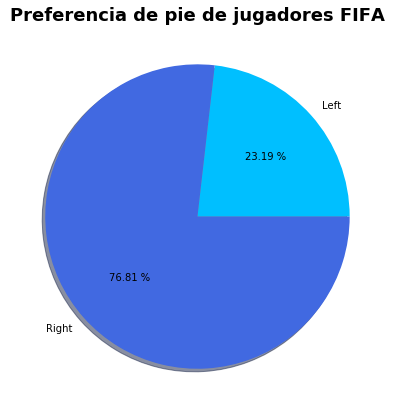

In [9]:
left = fifa.loc[fifa["Preferred Foot"] =="Left"].count()[0]

right = fifa.loc[fifa["Preferred Foot"] =="Right"].count()[0]

labels = ["Left", "Right"]
colores = ["deepskyblue", "royalblue"]


plt.figure(figsize= (9,7))
plt.pie([left,right],labels = labels,colors= colores,shadow=True, autopct = "%.2f %%")
plt.title("Preferencia de pie de jugadores FIFA", fontdict ={"fontweight":"bold", "fontsize":18})

plt.show()


- A la columna "Weight" le quitamos la etiqueta "lbs" y damos formato de enteros

- Creamos una columna llamada "Weight (kg)" y la posicionamos despues de la columna "Weight":

In [55]:
#quitamos "lbs" y formateamos a enteros int 
pesos = [int(x.strip("lbs")) if type(x) == str else x for x in fifa.Weight] 

#seleccionamos la lista anterior como la nueva columna Weight
fifa.Weight = pesos

#creamos nueva columna Weight(kg) en kilogramos
fifa["Weight(kg)"] = fifa.Weight * 0.45

#pasamos a lista los nombres de las columnas
cols = fifa.columns.tolist()

#obtenemos el indice de la columna Weight
index = cols.index("Weight")

#notemos que la nueva columna "Weight(kg)" es posicionada automaticamente al final
cols[index:]

['Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Release Clause',
 'Weight(kg)']

In [64]:
#eliminamos la nueva columna
cols.remove("Weight(kg)")

#colocamos la nueva columna despues de la columna Weight en libras:
cols.insert(index+1,"Weight(kg)")

#redefinimos el dataframe con el nuevo orden de columnas:
fifa = fifa[cols]

#Verificamos que la nueva columna sea correcta:
fifa[["Weight","Weight(kg)"]].head(5)

,Weight,Weight(kg)
0,159.0,71.55
1,183.0,82.35
2,150.0,67.50
3,168.0,75.60
4,154.0,69.30


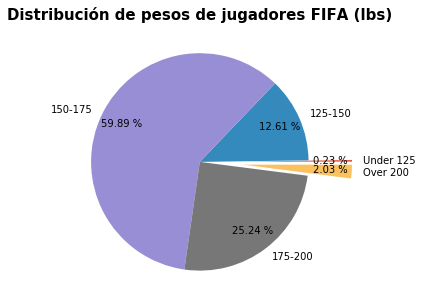

In [91]:
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy =  fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy =  fifa.loc[fifa.Weight >= 200].count()[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
labels = ["Under 125","125-150","150-175","175-200","Over 200"]
explode = (.4,0,0,0,.4)


plt.figure(figsize = (8,5))
plt.style.use("ggplot")

plt.pie(weights, labels = labels, autopct ="%.2f %%", 
        pctdistance = 0.8 , explode = explode)

plt.title("Distribución de pesos de jugadores FIFA (lbs)",
          fontdict ={"fontweight":"bold", "fontsize":15})

plt.show()

 Comparemos dos equipos respecto a su Overall Score:

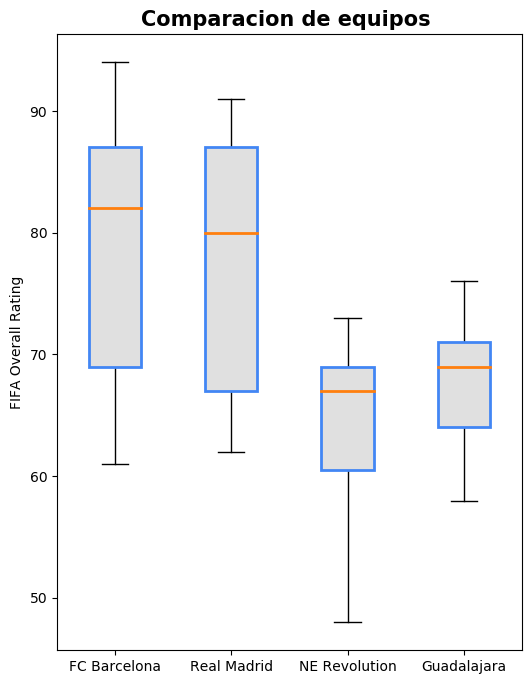

In [128]:
barcelona = fifa.loc[fifa.Club == "FC Barcelona"]["Overall"]
madrid = fifa.loc[fifa.Club == "Real Madrid"]["Overall"]
revs = fifa.loc[fifa.Club == "New England Revolution"]["Overall"]
guadalajara = fifa.loc[fifa.Club == "Guadalajara"]["Overall"]

labels = ["FC Barcelona", "Real Madrid", "NE Revolution",
          "Guadalajara"]

plt.figure(figsize =(6,8))
plt.style.use("default")
boxes = plt.boxplot([barcelona, madrid, revs,guadalajara],labels = labels, 
                   patch_artist = True,
                   medianprops={"linewidth":2})


for box in boxes["boxes"]:
    box.set(color ="#4286f4", linewidth=2)
    box.set(facecolor="#e0e0e0")
plt.ylabel("FIFA Overall Rating")

plt.title("Comparacion de equipos ",fontdict ={"fontweight":"bold", "fontsize":15})

plt.show()

In [114]:
#Use esto para facilitar la busqueda de algun equipo:

l = fifa.Club.astype(str).unique().tolist()

l.sort()

l

[' SSV Jahn Regensburg',
 '1. FC Heidenheim 1846',
 '1. FC Kaiserslautern',
 '1. FC Köln',
 '1. FC Magdeburg',
 '1. FC Nürnberg',
 '1. FC Union Berlin',
 '1. FSV Mainz 05',
 'AC Ajaccio',
 'AC Horsens',
 'AD Alcorcón',
 'ADO Den Haag',
 'AEK Athens',
 'AFC Wimbledon',
 'AIK',
 'AJ Auxerre',
 'AS Béziers',
 'AS Monaco',
 'AS Nancy Lorraine',
 'AS Saint-Étienne',
 'AZ Alkmaar',
 'Aalborg BK',
 'Aarhus GF',
 'Aberdeen',
 'Accrington Stanley',
 'Adelaide United',
 'Ajax',
 'Akhisar Belediyespor',
 'Al Ahli',
 'Al Batin',
 'Al Faisaly',
 'Al Fateh',
 'Al Fayha',
 'Al Hazem',
 'Al Hilal',
 'Al Ittihad',
 'Al Nassr',
 'Al Qadisiyah',
 'Al Raed',
 'Al Shabab',
 'Al Taawoun',
 'Al Wehda',
 'Alanyaspor',
 'Albacete BP',
 'Alianza Petrolera',
 'Amiens SC',
 'América FC (Minas Gerais)',
 'América de Cali',
 'Angers SCO',
 'Antalyaspor',
 'Argentinos Juniors',
 'Arka Gdynia',
 'Arsenal',
 'Ascoli',
 'Aston Villa',
 'Atalanta',
 'Athletic Club de Bilbao',
 'Atiker Konyaspor',
 'Atlanta United',
 'At